In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [55]:
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/with_mask')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/without_mask')))

1179
1055


In [56]:
try:
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/training')
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/training/with-mask')
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/training/without-mask')
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/testing')
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/testing/with-mask')
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/testing/without-mask')
except OSError:
    print('error')

error


In [57]:
from random import shuffle

# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
  all_images = os.listdir(SOURCE)
  shuffle(all_images)
  splitting_index = round(SPLIT_SIZE*len(all_images))
  train_images = all_images[:splitting_index]
  test_images = all_images[splitting_index:]
  #copy training images
  for img in train_images:
    src = os.path.join(SOURCE, img)
    dst = os.path.join(TRAINING, img)
    if os.path.getsize(src) <= 0:
        print(img+" is zero length, so ignoring!!")
    else:
        shutil.copyfile(src, dst)
  #copy testing images
  for img in test_images:
    src = os.path.join(SOURCE, img)
    dst = os.path.join(TESTING, img)
    if os.path.getsize(src) <= 0:
        print(img+" is zero length, so ignoring!!")
    else:
        shutil.copyfile(src, dst)


WMASK_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/with_mask/'
WOMASK_SOURCE_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/without_mask/'
TRAINING_WMASK_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/training/with-mask/'
TRAINING_WOMASK_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/training/without-mask/'
TESTING_WMASK_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/testing/with-mask/'
TESTING_WOMASK_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/testing/without-mask/'

split_size = .9     # 90% traing data and 10% testing data
split_data(WMASK_SOURCE_DIR, TRAINING_WMASK_DIR, TESTING_WMASK_DIR, split_size)
split_data(WOMASK_SOURCE_DIR, TRAINING_WOMASK_DIR, TESTING_WOMASK_DIR, split_size)

KeyboardInterrupt: ignored

In [58]:
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/training/with-mask/')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/training/without-mask/')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/testing/with-mask/')))
print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/testing/without-mask/')))


1141
986
152
143


In [0]:
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 64)       

In [63]:
TRAINING_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/training'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = '/content/drive/My Drive/Colab Notebooks/dataset/testing'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2127 images belonging to 2 classes.
Found 295 images belonging to 2 classes.


In [64]:
history = model.fit(train_generator,
                              epochs=35,
                              steps_per_epoch=20,
                              verbose=1,
                              validation_data=validation_generator,
                              validation_steps=20)

Epoch 1/35
20/20 [==============================] - 66s 3s/step - loss: 0.6966 - acc: 0.5312 - val_loss: 0.7506 - val_acc: 0.4847
Epoch 2/35
20/20 [==============================] - 64s 3s/step - loss: 0.6801 - acc: 0.6271 - val_loss: 0.6126 - val_acc: 0.7051
Epoch 3/35
20/20 [==============================] - 65s 3s/step - loss: 0.5922 - acc: 0.7117 - val_loss: 0.8712 - val_acc: 0.5568
Epoch 4/35
20/20 [==============================] - 69s 3s/step - loss: 0.5861 - acc: 0.7206 - val_loss: 0.4509 - val_acc: 0.8220
Epoch 5/35
20/20 [==============================] - 65s 3s/step - loss: 0.5008 - acc: 0.7922 - val_loss: 0.6188 - val_acc: 0.6703
Epoch 6/35
20/20 [==============================] - 64s 3s/step - loss: 0.4676 - acc: 0.8018 - val_loss: 0.4227 - val_acc: 0.8186
Epoch 7/35
20/20 [==============================] - 64s 3s/step - loss: 0.4309 - acc: 0.8058 - val_loss: 0.4041 - val_acc: 0.8415
Epoch 8/35
20/20 [==============================] - 65s 3s/step - loss: 0.4085 - acc: 0.82

Text(0.5, 1.0, 'Training and validation loss')

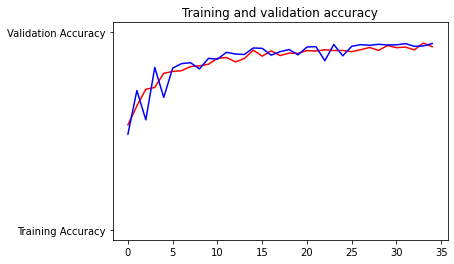

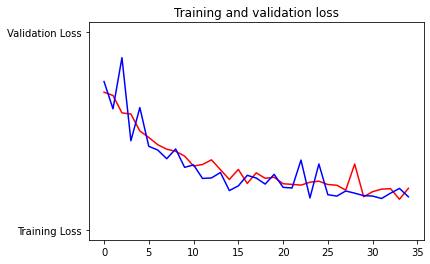

In [65]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [66]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(float(classes[0]))
  if classes[0]>0.5:
    print(fn + " has no mask")
  else:
    print(fn + " has a mask")
 

Saving 6.jpg to 6.jpg
Saving 12.jpg to 12.jpg
Saving 15.jpg to 15.jpg
0.0
6.jpg has a mask
1.0
12.jpg has no mask
1.0
15.jpg has no mask
